# CODE CLAUSE INTERNSHIP

# DATA SCIENCE INTERN

# Churn Prediction in Telecom Industry Using Logistic Regression

In [203]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

# churn data

In [204]:
churn_data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [205]:
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [206]:
churn_data.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [207]:
churn_data.shape

(7043, 21)

In [208]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [209]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [210]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [211]:
churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [212]:
#checking data types of all the columns
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [213]:
#Converting Total Changes to a numerical data type.
churn_data.TotalCharges=pd.to_numeric(churn_data.TotalCharges,errors='coerce')

In [214]:
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [215]:
#Removing missing values
churn_data.dropna(inplace=True)
#Remove customer IDs from the data set
df=churn_data.iloc[:,1:]
#Converting the Predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df['Churn'].replace(to_replace='No',value=0,inplace=True)

#Let's covert all the categorical variables into dummy variables
df1_dummies=pd.get_dummies(df)
df1_dummies.head()



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

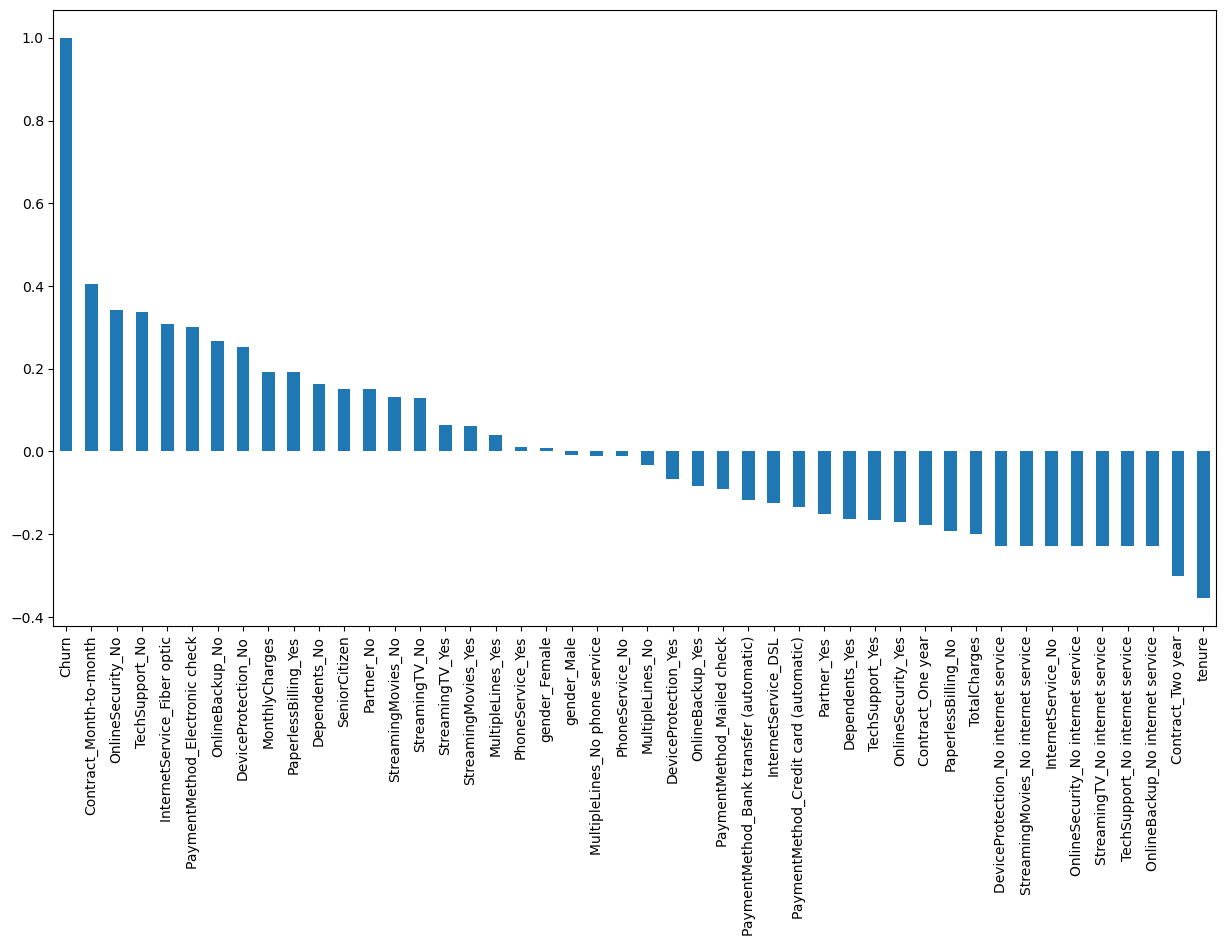

In [216]:
#Get Correlation of 'Churn' with other variables:
plt.figure(figsize=(15,8))
df1_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

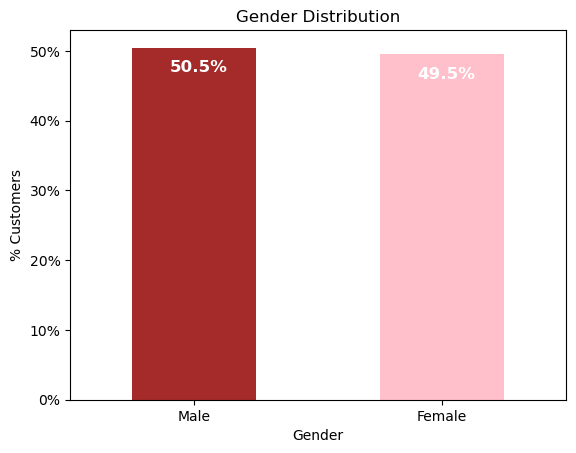

In [217]:
colors=['brown','pink']
ax=(churn_data['gender'].value_counts()*100.0/len(churn_data)).plot(kind='bar',stacked=True,rot=0,color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title("Gender Distribution")

#create a list to collect the plt.patches data
totals=[]

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar labels using above list
total=sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes u or down
    ax.text(i.get_x()+.15,i.get_height()-3.5, \
           str(round((i.get_height()/total),1))+'%',fontsize=12,color='white',weight='bold')

Text(0.5, 1.0, '% of Senior Citizens')

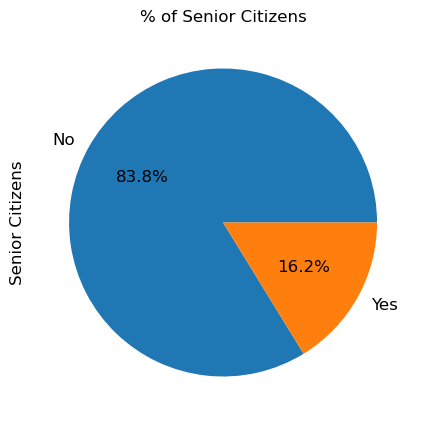

In [218]:
ax=(churn_data['SeniorCitizen'].value_counts()*100.0/len(churn_data))\
.plot.pie(autopct='%.1f%%',labels=['No','Yes'],figsize=(5,5),fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize=12)
ax.set_title('% of Senior Citizens',fontsize=12)

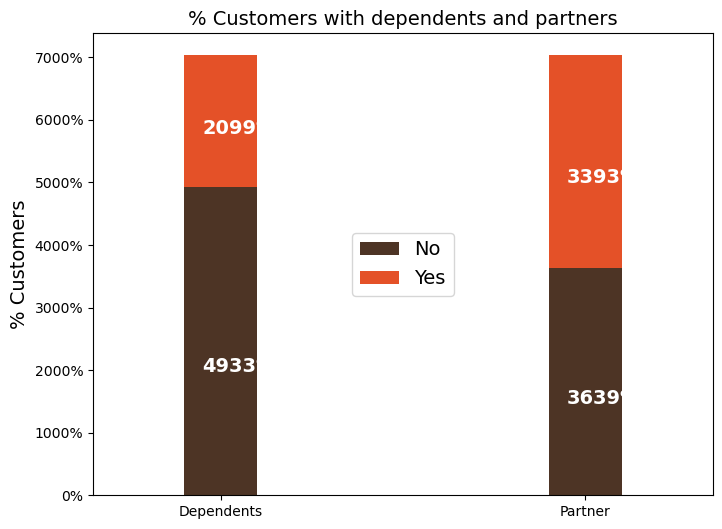

In [219]:
df1=pd.melt(churn_data,id_vars=['customerID'],value_vars=['Dependents','Partner'])
df2=df1.groupby(['variable','value']).count().unstack()
df2=df2+100/len(churn_data)
colors=['#4D3425','#E45128']
ax=df2.loc[:,'customerID'].plot.bar(stacked=True,color=colors,figsize=(8,6),rot=0,width=0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size=14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size=14)
ax.legend(loc='center',prop={'size':14})

for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
                color='white',weight='bold',size=14)

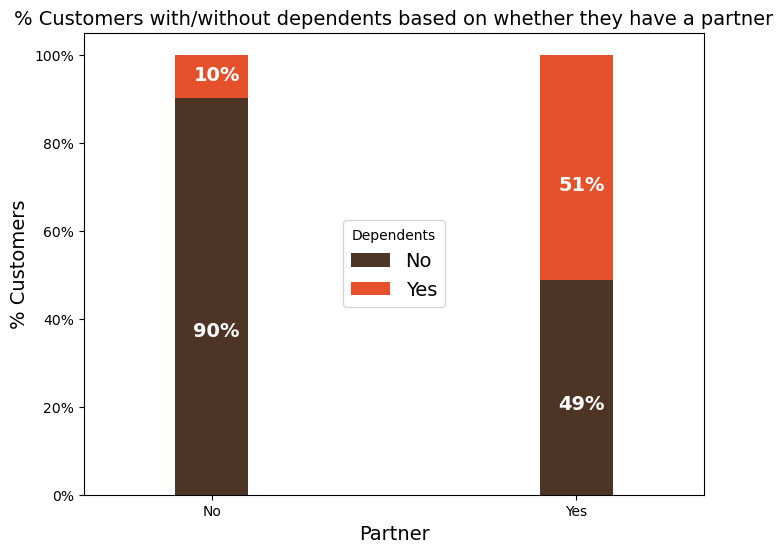

In [220]:
colors=['#4D3425','#E4512B']
partner_dependents=churn_data.groupby(['Partner','Dependents']).size().unstack()

ax=(partner_dependents.T*100.0/partner_dependents.T.sum()).T.plot(kind='bar',width=0.2,stacked=True,rot=0,figsize=(8,6),color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title='Dependents',fontsize=14)
ax.set_ylabel('% Customers',size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size=14)
ax.xaxis.label.set_size(14)
 
#Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
                color='white',weight='bold',size=14)

Text(0.5, 1.0, '# of Customers by their tenure')

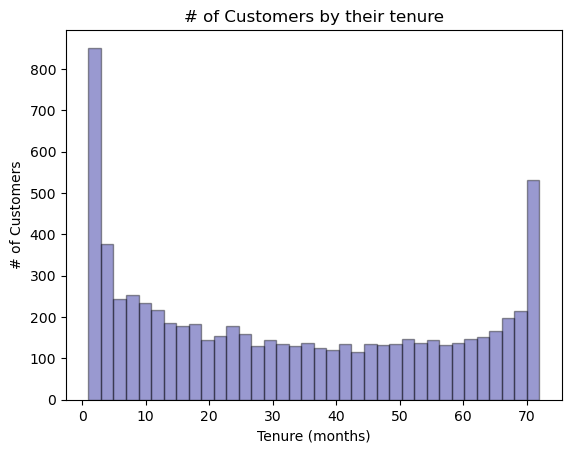

In [221]:
ax=sns.distplot(churn_data['tenure'],hist=True,kde=False,bins=int(180/5),color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

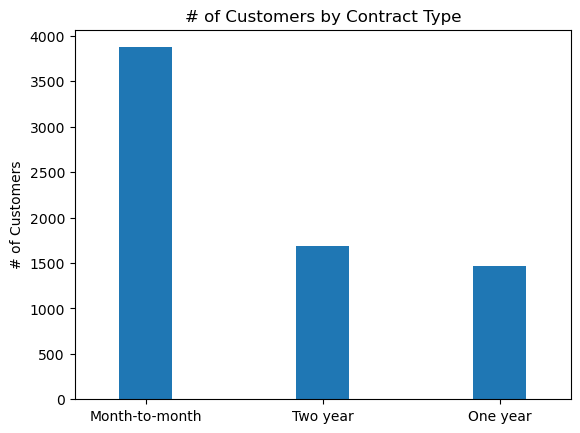

In [222]:
ax=churn_data['Contract'].value_counts().plot(kind='bar',rot=0,width=0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

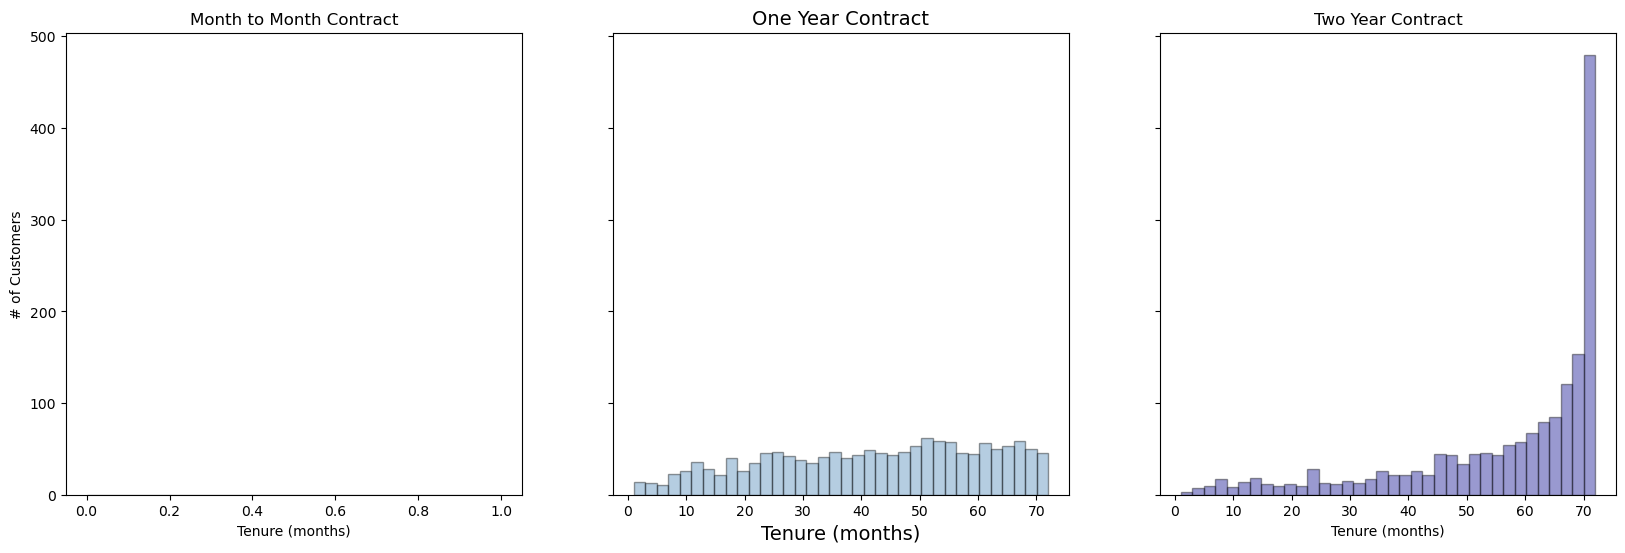

In [223]:
fig, (ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(20,6))

ax=sns.distplot(churn_data[churn_data['Contract']=='Month-to-Month']['tenure'],hist=True,kde=False,bins=int(180/5),color='turquoise',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4},ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax=sns.distplot(churn_data[churn_data['Contract']=='One year']['tenure'],hist=True,kde=False,bins=int(180/5),color='steelblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4},ax=ax2)
ax.set_xlabel('Tenure (months)',size=14)
ax.set_title('One Year Contract',size=14)

ax=sns.distplot(churn_data[churn_data['Contract']=='Two year']['tenure'],hist=True,kde=False,bins=int(180/5),color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4},ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

In [224]:
churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

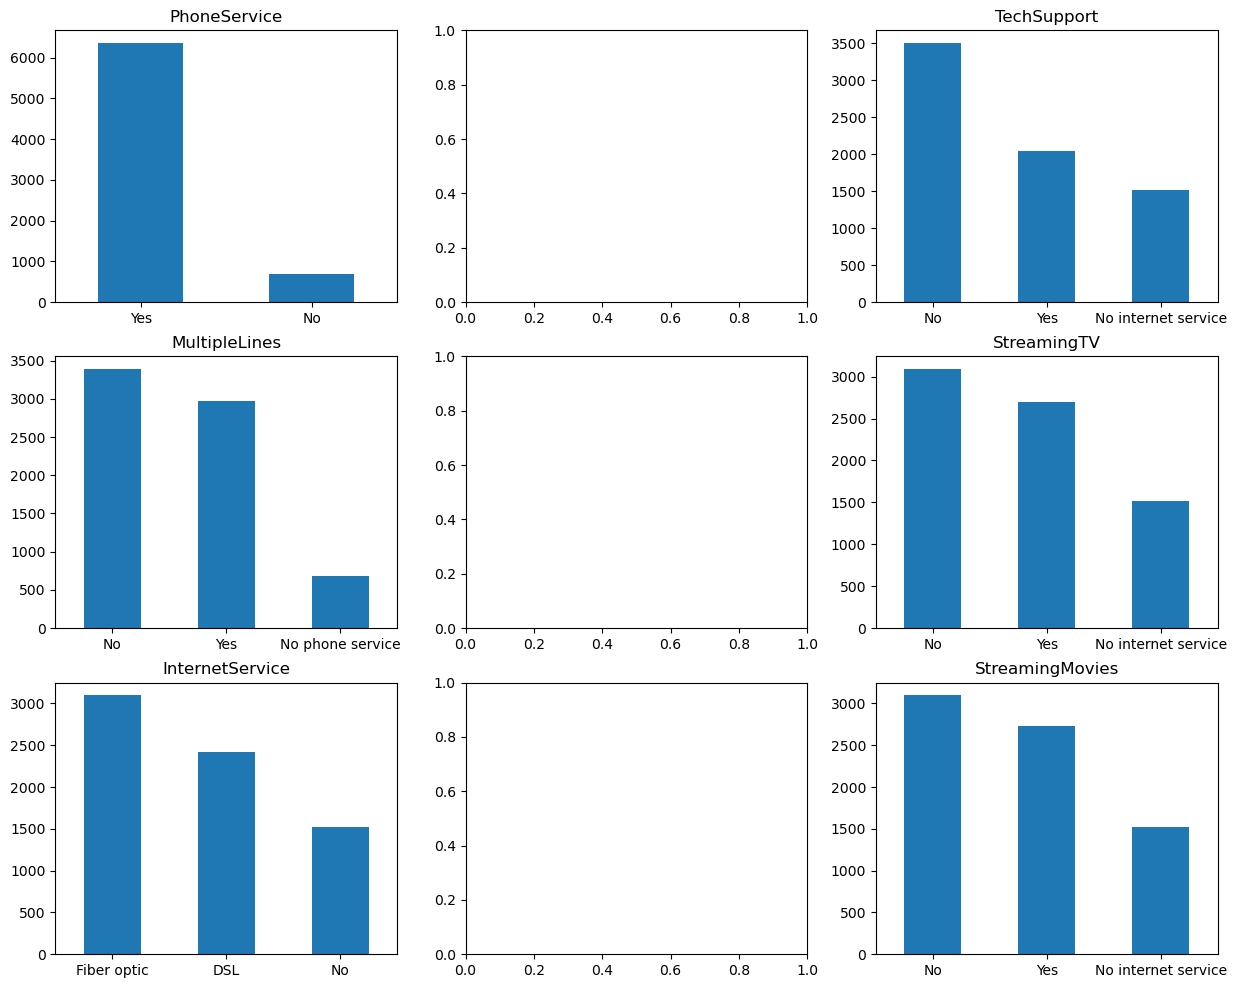

In [225]:
services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,12))
for i,item in enumerate(services):
    if i<3:
        ax=churn_data[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)
        
    elif i>=6 and i<6:
        ax=churn_data[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)
        
    elif i<9:
        ax=churn_data[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0)
    ax.set_title(item)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

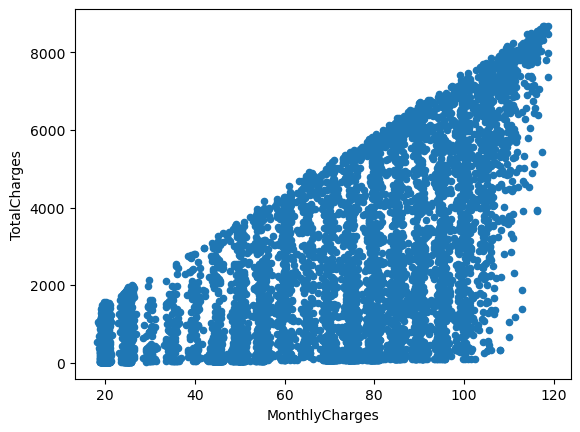

In [226]:
churn_data[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges',y='TotalCharges')

## Finally let's take a look at our predictor variable(churn) and understand its interaction with other important variables as found out in the correlation plot.

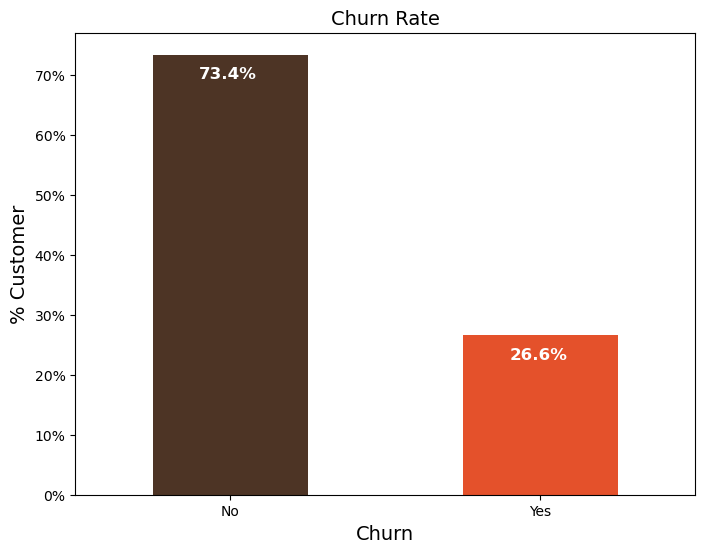

In [227]:
colors=['#4D3425','#E4512B']
ax=(churn_data['Churn'].value_counts()*100.0/len(churn_data)).plot(kind='bar',stacked=True,rot=0,color=colors,figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customer',size=14)
ax.set_xlabel('Churn',size=14)
ax.set_title('Churn Rate',size=14)

#Create a list to collect the plt.patches data
totals=[]

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    
#set individual bar labels using above list
total=sum(totals)

for i in ax.patches:
    #get_width pulls left or right;geet_y pushes up or down
    ax.text(i.get_x()+.15,i.get_height()-4.0,str(round((i.get_height()/total),1))+'%',fontsize=12,color='white',weight='bold')

# Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

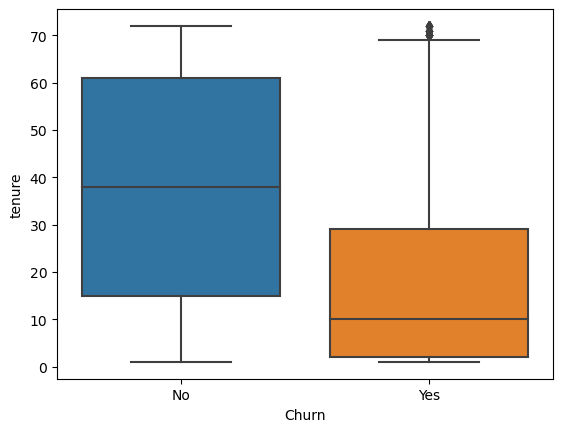

In [228]:
sns.boxplot(x=churn_data.Churn,y=churn_data.tenure)

# Churn by Contract Type

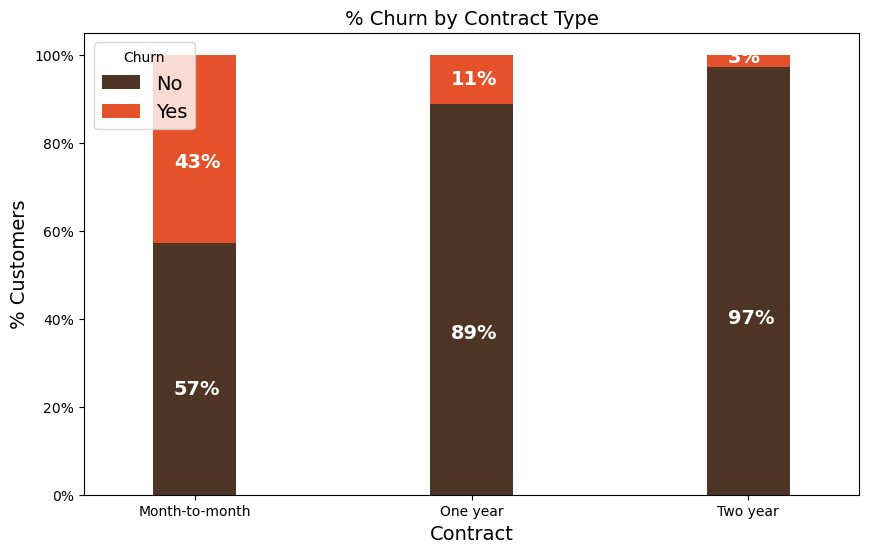

In [229]:
colors=['#4D3425','#E4512B']
contract_churn=churn_data.groupby(['Contract','Churn']).size().unstack()

ax=(contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind='bar',width=0.3,stacked=True,rot=0,figsize=(10,6),color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('% Customers',size=14)
ax.set_title('% Churn by Contract Type',size=14)
ax.xaxis.label.set_size(14)
 
#Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
                color='white',weight='bold',size=14)

# Churn by Seniority

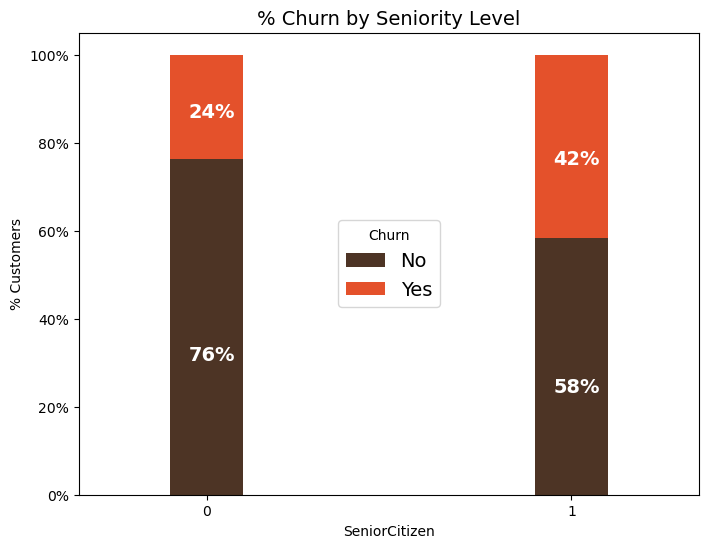

In [230]:
colors=['#4D3425','#E4512B']
seniority_churn=churn_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax=(seniority_churn.T*100.0/seniority_churn.T.sum()).T.plot(kind='bar',width=0.2,stacked=True,rot=0,figsize=(8,6),color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title='Churn')
ax.set_ylabel('% Customers')
ax.set_title('% Churn by Seniority Level',size=14)
 
#Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
                color='white',weight='bold',size=14)

# Churn by Monthly Charges

Text(0.5, 1.0, 'Dstribution of monthly chages by churn')

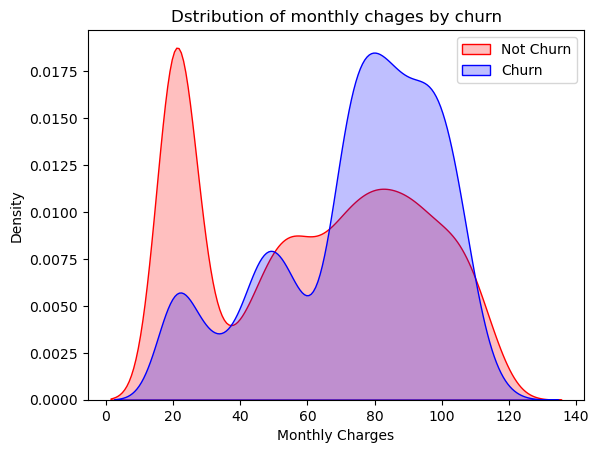

In [231]:
ax=sns.kdeplot(churn_data.MonthlyCharges[(churn_data["Churn"]=='No')],color="Red",shade=True)
ax=sns.kdeplot(churn_data.MonthlyCharges[(churn_data["Churn"]=='Yes')],color="Blue",shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Dstribution of monthly chages by churn')

# Churn by Total Charges

Text(0.5, 1.0, 'Dstribution of total chages by churn')

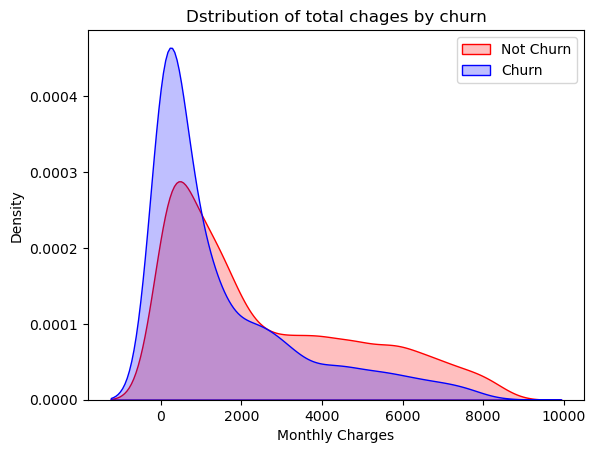

In [232]:
ax=sns.kdeplot(churn_data.TotalCharges[(churn_data["Churn"]=='No')],color="Red",shade=True)
ax=sns.kdeplot(churn_data.TotalCharges[(churn_data["Churn"]=='Yes')],color="Blue",shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Dstribution of total chages by churn')

# Developing Predictive Model Using Logistic Regression

In [233]:
y=df1_dummies['Churn'].values
x=df1_dummies.drop(columns=['Churn'])

#Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features=x.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x))
x.columns=features

In [234]:
#Create Train and Test Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=125)

In [235]:
#Running Logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=model.fit(x_train,y_train)

In [236]:
from sklearn import metrics
prediction_test=model.predict(x_test)
#Print the prediction accuracy
print(metrics.accuracy_score(y_test,prediction_test))

0.8224431818181818


Axes(0.125,0.11;0.775x0.77)


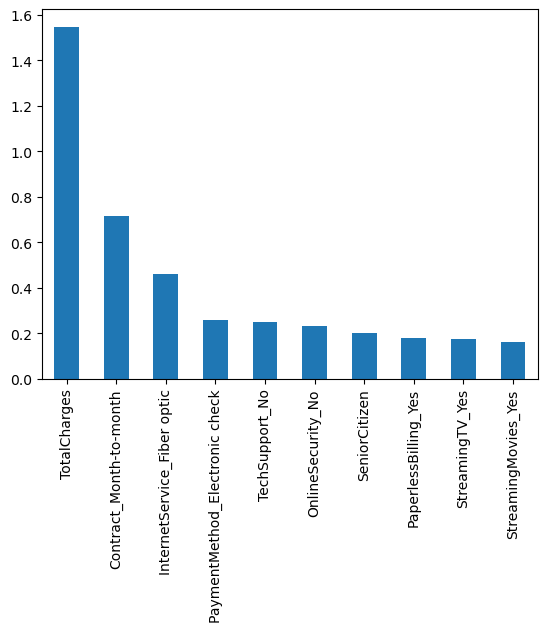

In [237]:
#To get the weights of all the variables
weights=pd.Series(model.coef_[0],index=x.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


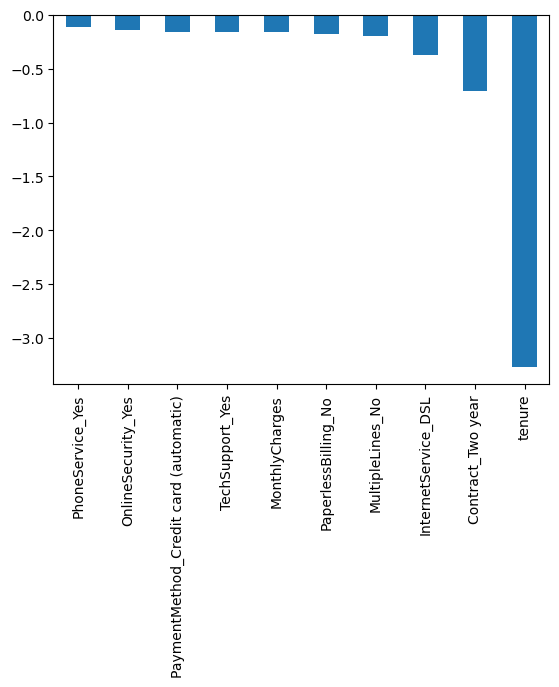

In [238]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

# Observations

We can see that some variables have a negative relation to our predicted variable(Churn),while some have positive relation.
Negative relation means that likeliness of churn decreases with that variable.

As we saw in oue EDA,having a 2 month contract reduces chances of churn.2 month contract along with tenure have the most negative relation with Churn as predicted by Logistic Regression.


# Conclusion:

Hence,the given dataset "Telco-customers-churn" is predicted using Logistic Regression.